# Imports and Data

In [107]:
# Imports
import pickle
import numpy as np
from matplotlib.pyplot import cm
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
np.set_printoptions(threshold=sys.maxsize)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *
from MM_DORA_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze
AllNames=RewNames+UnrewNames

# Calculations

In [6]:
ma=NewMaze(6)

## Calculate and Plot Cross Entropies

In [35]:
betas = np.linspace(0.2,2,10,endpoint=True)
print(betas)
gammas = np.linspace(0,1,11,endpoint=True)
print(gammas)
etas = np.linspace(0.1,1,10, endpoint=True)
print(etas)
deltas = [1]
frame = 10
mode = 1
fstr = 'outdata_DORA/%s_ces_'+str(frame)+'frame_'+str(mode)+'.npy'

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [15]:
GetCEs('B5',1,0.1,0.1,ma,mode,frame)

[1.5849625007211563,
 1.5657590758741868,
 1.5704780153093656,
 1.5624018427892503,
 1.5614871970121957,
 1.5614433326520873,
 1.557420069895467,
 1.5577326183696851,
 1.557663385151532,
 1.5590601297046731,
 1.5611467877796688,
 1.566023366567483,
 1.5673193220517914,
 1.5686614695480143,
 1.5659391750665834,
 1.5653117205256197,
 1.564837113127174,
 1.566727152432311,
 1.5667272460901511,
 1.5658103576329354,
 1.5696028179333243,
 1.5731707241570196,
 1.5743657420556962,
 1.5743738334308028,
 1.5737402766679844,
 1.5732169857439853,
 1.5738355368374817,
 1.5751923009684352,
 1.5741703300997647,
 1.5738667576561953,
 1.5726205052345368,
 1.5724570793441135,
 1.5721842989048753,
 1.5728275643958338,
 1.572762346547556,
 1.5730278396507693,
 1.5724486054927733,
 1.5727866685031784,
 1.5736346641634382,
 1.5746540051394868,
 1.5755120779034442,
 1.5763551633219488,
 1.5783034713500999,
 1.578935541539274,
 1.5792459397995853,
 1.5788607800550374,
 1.5779630650043874,
 1.5776203024719935,

In [36]:
OutCEs(['B5'],fstr,betas,gammas,etas,deltas,ma,frame,mode)

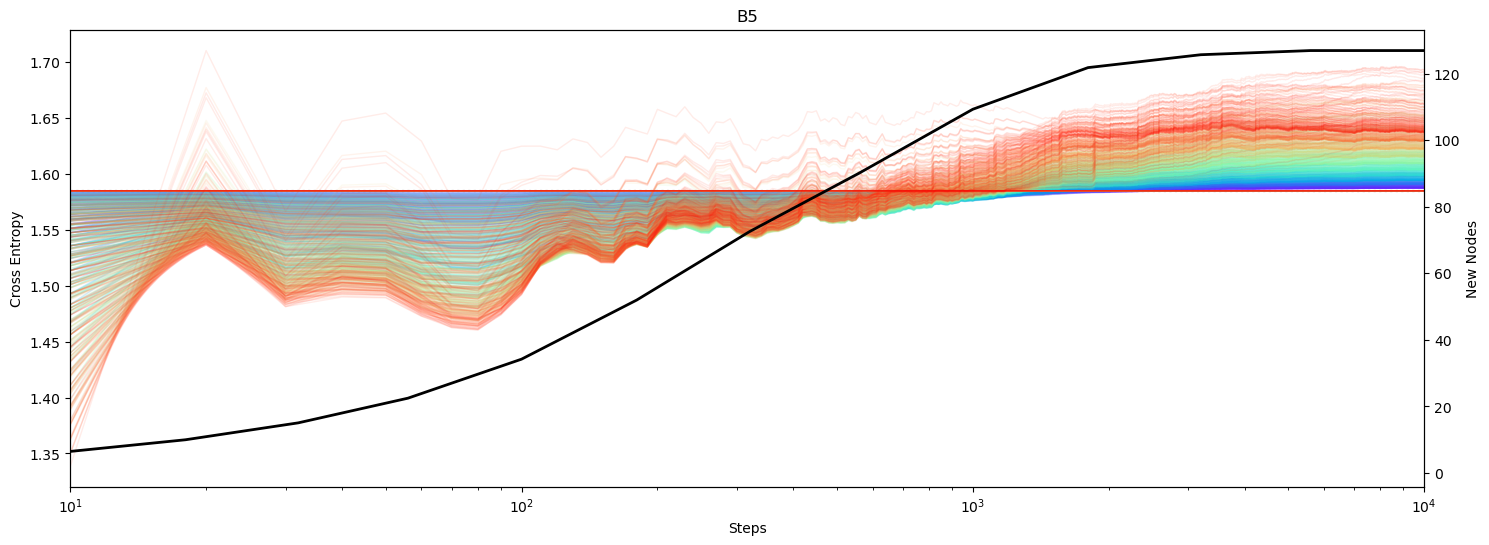

In [40]:
fig,_ = PlotMult(['B5'],fstr,betas,gammas,etas,deltas,frame)

In [58]:
fig.savefig('outdata_DORA/Cross-Entropy_Steps_New-Nodes_3_Full.png')

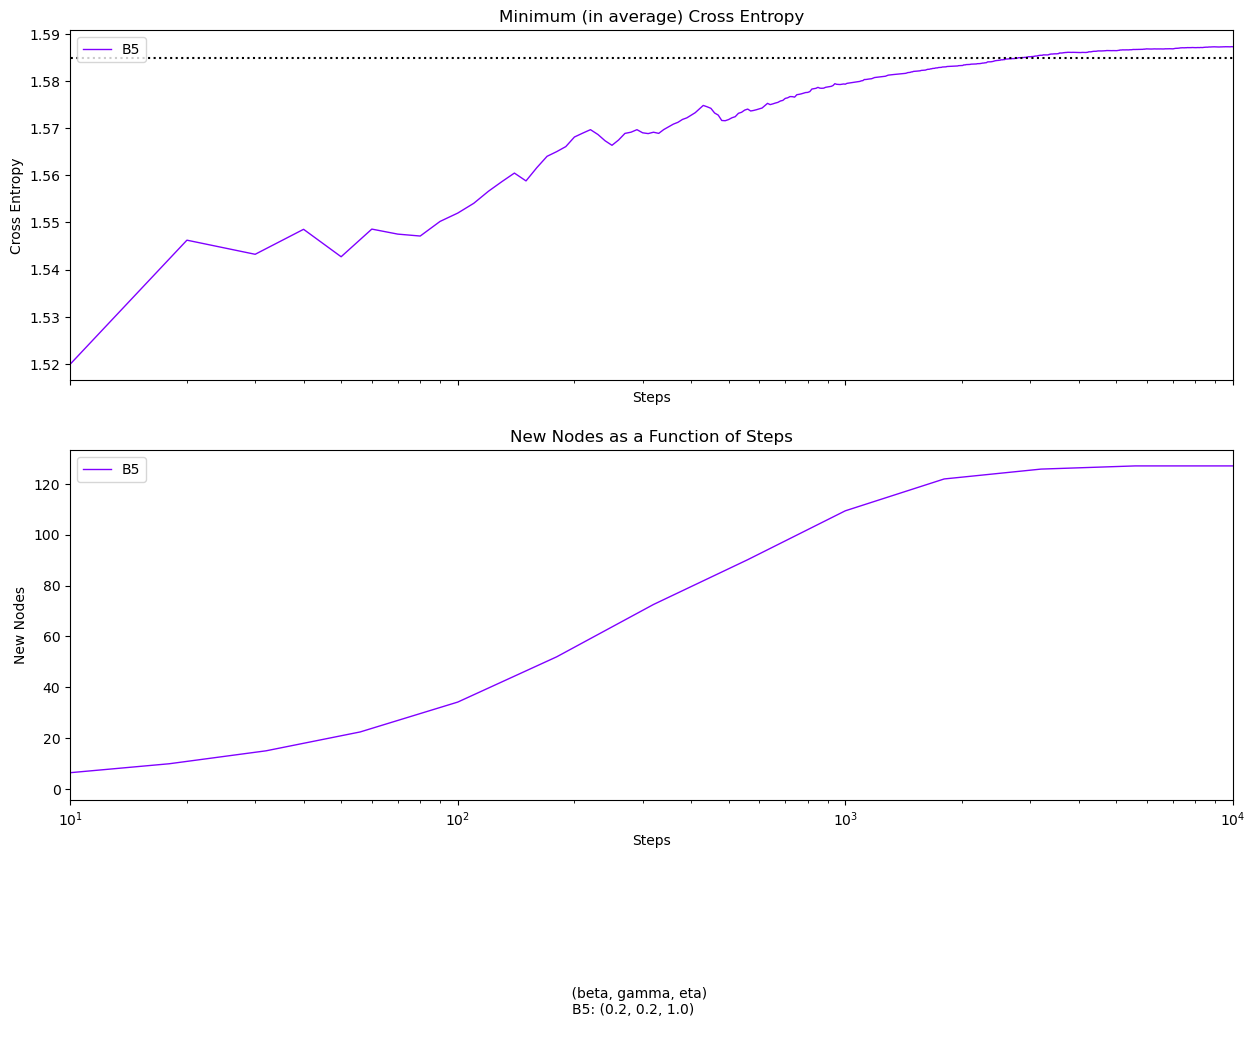

In [110]:
fig,_ = PlotMin(['B5'],fstr,betas,gammas,etas,frame)

In [62]:
fig.savefig('outdata_DORA/Minimum-Cross-Entropy_Steps_3_Full.png',bbox_inches="tight")

## Save Mins

In [139]:
gammas = np.linspace(0,1,11,endpoint=True)
etas = np.linspace(0.1,1,10, endpoint=True)
for mode in range(1,4):
    if mode == 3:
        betas = np.linspace(0.2,4,20,endpoint=True)
    else:
        betas = np.linspace(0.2,2,10,endpoint=True)

    fstr_load = 'outdata_DORA/%s_ces_'+str(frame)+'frame_'+str(mode)+'.npy'
    str_save = 'outdata_DORA/arg-avg-min-ces_'+str(frame)+'frame_'+str(mode)+'.npy'
    avg_min_arg_list = GetAvgMinArgList(UnrewNamesSub,fstr_load,betas,gammas,etas)
    np.save(str_save,avg_min_arg_list)

## Run Simulations of Minimums

In [7]:
avg_min_arg_list1 = np.load('outdata_DORA/arg-avg-min-ces_10frame_1.npy', allow_pickle=True)
avg_min_arg_list2 = np.load('outdata_DORA/arg-avg-min-ces_10frame_2.npy', allow_pickle=True)
avg_min_arg_list3 = np.load('outdata_DORA/arg-avg-min-ces_10frame_3.npy', allow_pickle=True)

In [8]:
nbouts = 100
mode = 1
fstr = 'outdata_DORA/%s_sim-min_'+str(nbouts)+'_'+str(mode)+'.npy'

In [11]:
RunSim(['B5'],avg_min_arg_list1,nbouts,ma,mode)

0.2 1.0 0.1


[array([  0,   2,   5,  11,  23,  48,  97,  48,  97,  48,  98,  48,  97,
         48,  23,  11,  23,  11,  23,  48,  97,  48,  98,  48,  98,  48,
         97,  48,  97,  48,  23,  11,   5,  11,  24,  50,  24,  50, 102,
         50, 101,  50,  24,  49, 100,  49,  99,  49,  24,  50,  24,  50,
         24,  49, 100,  49,  24,  49,  24,  49,  24,  49, 100,  49,  99,
         49,  24,  50,  24,  11,  24,  11,  23,  48,  23,  11,  23,  11,
         23,  47,  23,  11,   5,  11,   5,   2,   6,   2,   6,   2,   6,
         14,  29,  60, 121,  60, 122,  60, 122,  60, 121,  60, 122,  60,
        122,  60, 121,  60, 121,  60,  29,  60, 121,  60, 121,  60, 122,
         60, 122,  60, 121,  60, 121,  60,  29,  59,  29,  60,  29,  59,
        119,  59, 119,  59,  29,  60,  29,  14,   6,  13,  27,  13,  27,
         13,  27,  55, 112,  55, 112,  55,  27,  55, 112,  55,  27,  55,
        111,  55, 111,  55, 112,  55, 111,  55, 111,  55, 112,  55, 112,
         55, 112,  55, 111,  55,  27,  56, 113,  56

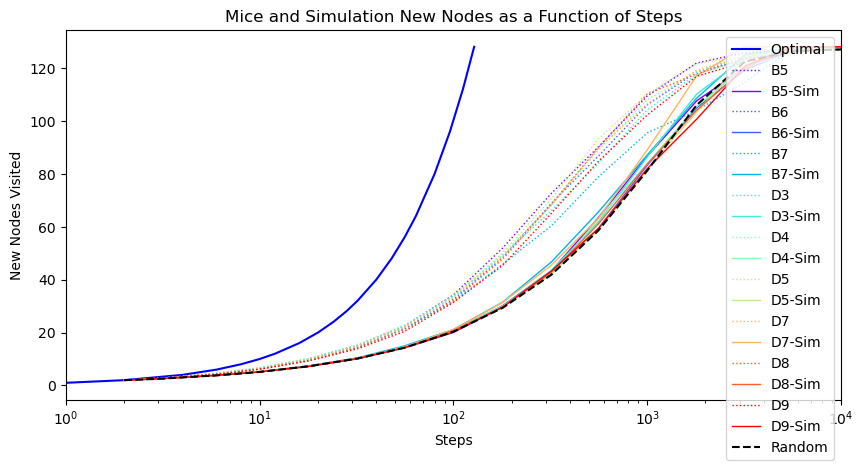

In [114]:
fig,_=PlotSim(UnrewNamesSub,fstr)

In [115]:
fig.savefig('outdata_DORA/Mice-Sim_Steps_New-Nodes_'+str(mode)+'.png',bbox_inches="tight")

## Calculate And Plot Cross Entropies For Mode = 4

In [123]:
betas = np.linspace(0.2,2,10,endpoint=True)
print(betas)
gammas = np.linspace(0,1,11,endpoint=True)
print(gammas)
etas = np.linspace(0.1,1,10, endpoint=True)
print(etas)
deltas = np.linspace(0,1,10, endpoint=False)
print(deltas)
params = [betas,gammas,etas,deltas]
frame = 10
mode = 4
maxnewnodespercent = 0.8
fstr = 'outdata_DORA/%s_ces_'+str(frame)+'frame_'+str(mode)+'.npy'

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [54]:
OutCEs(UnrewNamesSub,fstr,betas,gammas,etas,deltas,ma,frame,mode)

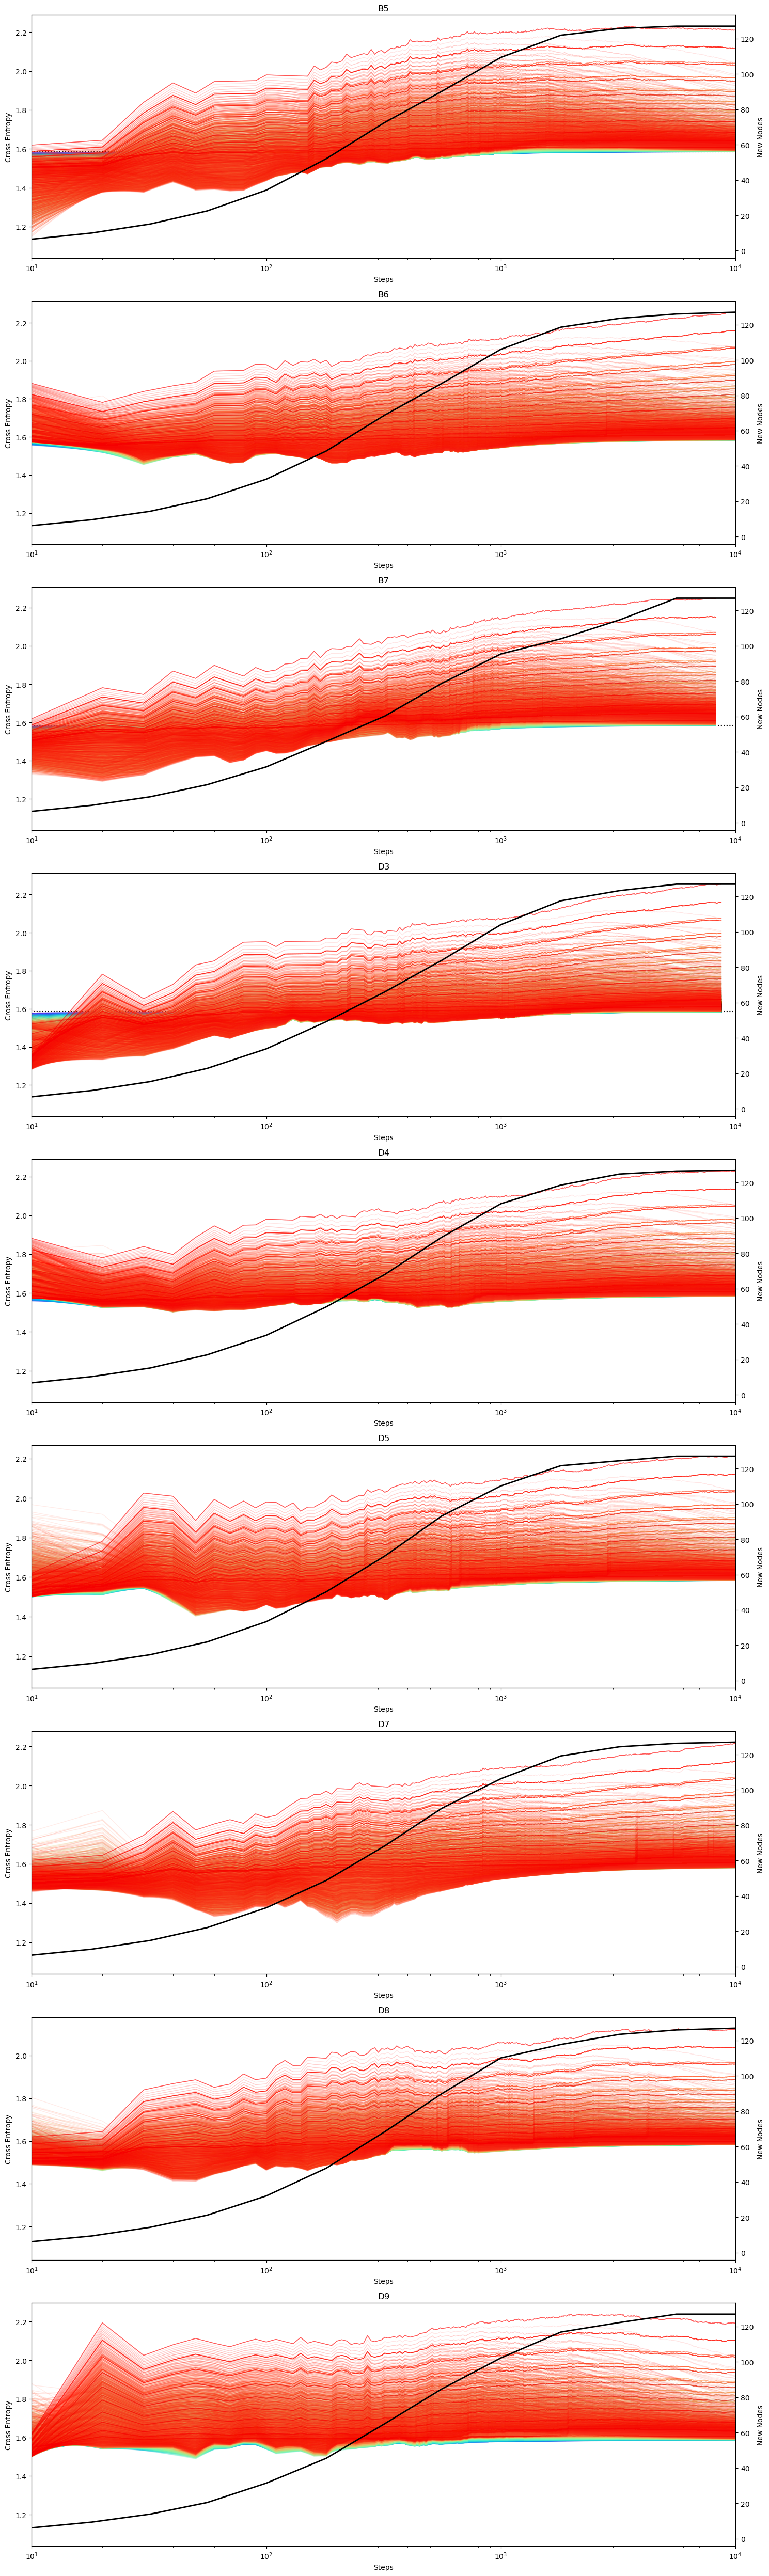

In [94]:
fig,_ = PlotMult(UnrewNamesSub,fstr,params,frame)

In [95]:
fig.savefig('outdata_DORA/Cross-Entropy_Steps_New-Nodes_4.png')

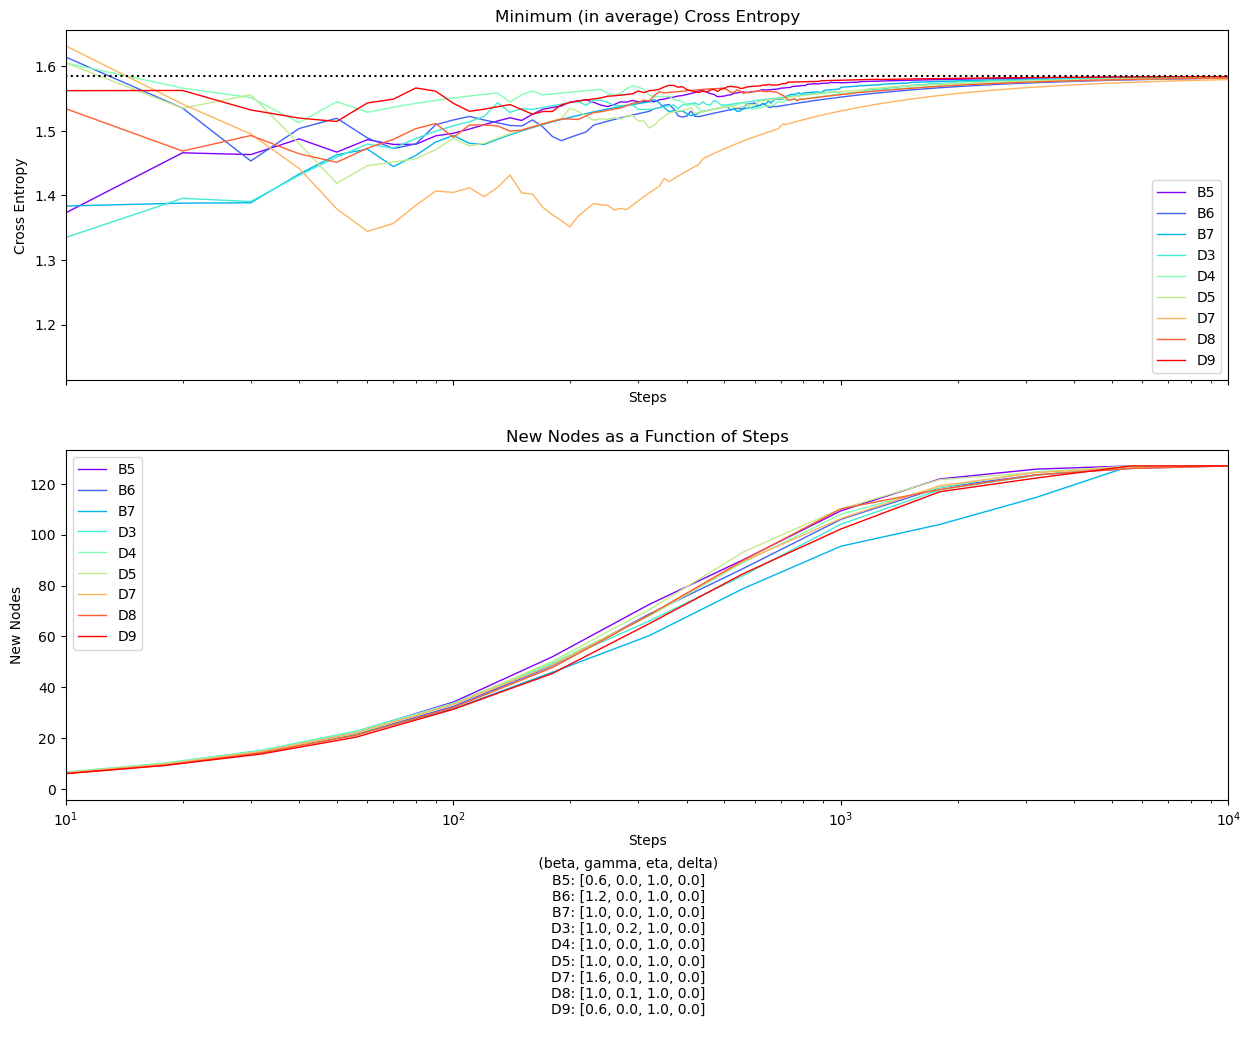

In [91]:
fig,_ = PlotMin(UnrewNamesSub,fstr,params,frame)

In [92]:
fig.savefig('outdata_DORA/Minimum-Cross-Entropy_Steps_4.png',bbox_inches="tight")

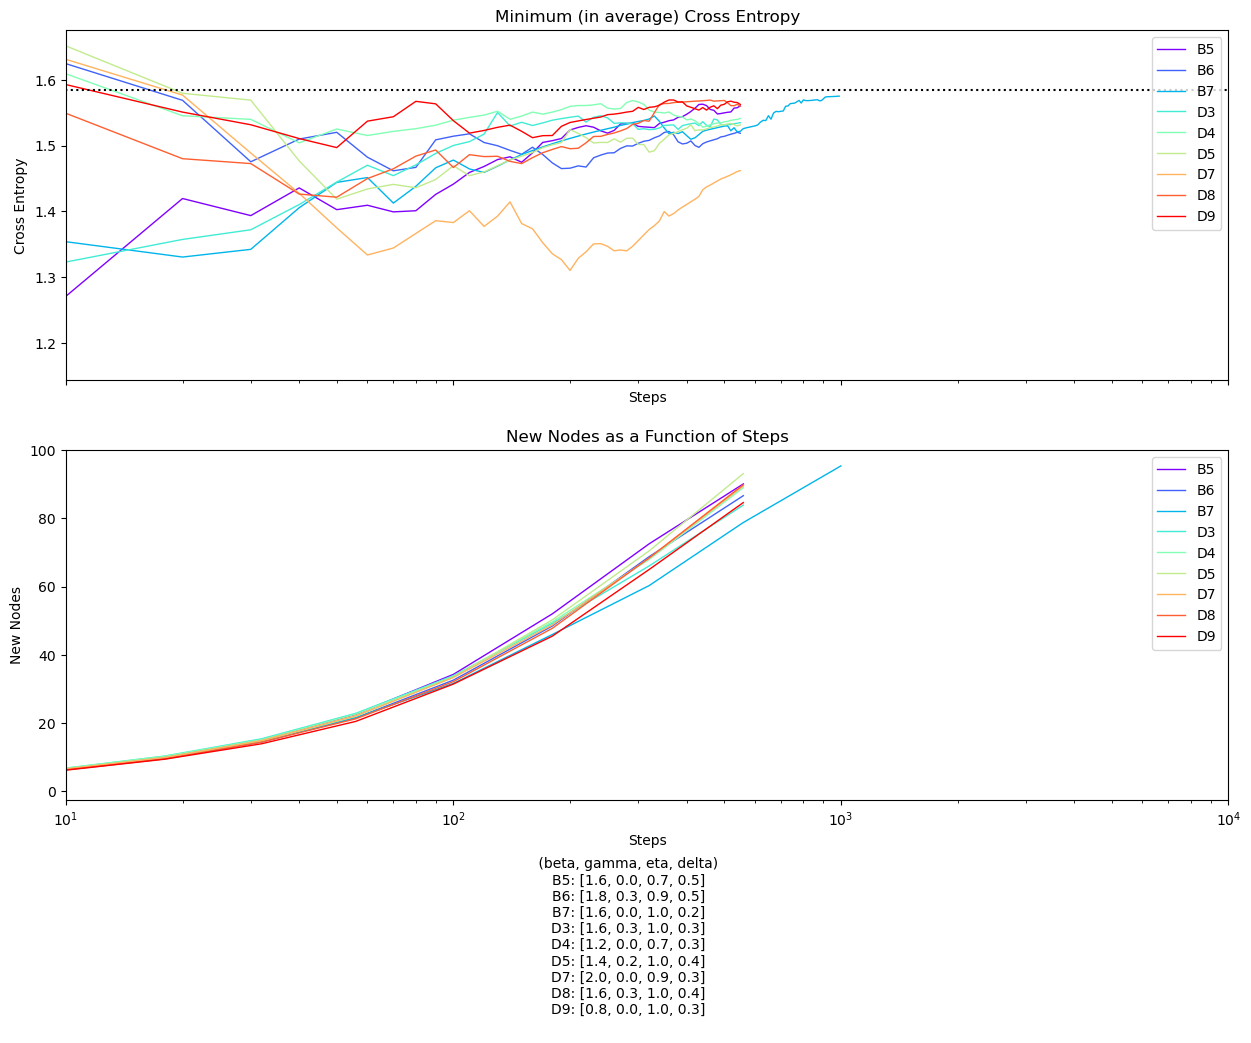

In [103]:
fig,_ = PlotMin(UnrewNamesSub,fstr,params,frame,maxnewnodespercent)

In [104]:
fig.savefig('outdata_DORA/Minimum-Cross-Entropy_Steps_80p_4.png',bbox_inches="tight")

In [183]:
nbouts = 100
mode = 3
maxnewnodespercent = 1
fstr = 'outdata_DORA/%s_ces_'+str(frame)+'frame_'+str(mode)+'.npy'
avg_min_arg_list = GetAvgMinArgList(UnrewNamesSub,fstr,params,frame,maxnewnodespercent)
str_save = 'outdata_DORA/arg-avg-min-ces_'+str(frame)+'frame_'+str(int(maxnewnodespercent*100))+'p_'+str(mode)+'.npy'
np.save(str_save,avg_min_arg_list)

In [184]:
mode=3
maxnewnodespercent = 1
nbouts = 100
fstr = 'outdata_DORA/%s_sim-min_'+str(nbouts)+'_'+str(int(maxnewnodespercent*100))+'p_'+str(mode)+'.npy'
avg_min_arg_list=np.load('outdata_DORA/arg-avg-min-ces_'+str(frame)+'frame_'+str(int(maxnewnodespercent*100))+'p_'+str(mode)+'.npy',allow_pickle=True)
print(avg_min_arg_list)
sim=RunSim(UnrewNamesSub,avg_min_arg_list,nbouts,ma,mode,fstr)

[[2.  0.9 0.7]
 [2.  0.9 0.7]
 [1.8 0.9 0.7]
 [1.6 1.  0.9]
 [2.  0.8 0.7]
 [2.  0.9 0.7]
 [1.6 0.9 0.9]
 [1.  0.8 0.9]
 [1.  1.  0.9]]


In [175]:
print(sim[1])

[  0 127   0   2   0   2   6  14  29  60 121  60 122  60  29  59 119  59
 120  59  29  60  29  60 122  60 121  60 122  60  29  14  30  62 126  62
 125  62  30  61  30  14   6  13  28  58  28  57 116  57 115  57  28  13
  27  55 112  55  27  56 113  56 114  56 114  56  27  13  27  55 111  55
 111  55 112  55  27  13   6  14  29  60 121  60 122  60 122  60 121  60
 121  60  29  14   6  14  30  62 125  62  30  14  30  62 126  62 126  62
 125  62 125  62  30  61 124  61 123  61 124  61 124  61 123  61 123  61
  30  61 123  61 123  61 124  61 123  61 124  61  30  62 125  62  30  62
  30  61 124  61  30  14  30  14  29  14  30  61  30  61 123  61 123  61
 124  61 123  61 123  61  30  61  30  62 126  62  30  61  30  14  29  59
 119  59 120  59  29  60 121  60  29  14  30  14  29  59  29  59 119  59
 119  59 120  59 120  59  29  59 119  59 120  59 120  59  29  59 120  59
 120  59 119  59  29  59  29  14   6   2   5  12   5  11  23  11  23  47
  95  47  23  47  96  47  95  47  95  47  23  48  9

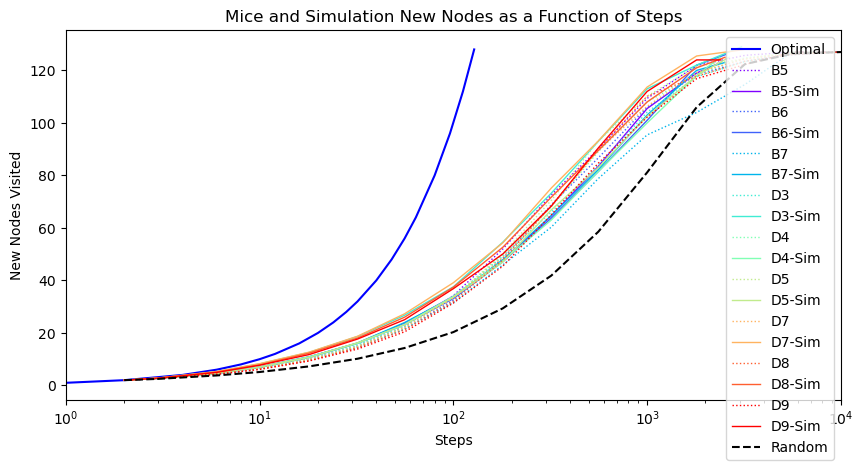

In [185]:
fig,_=PlotSim(['D7'],fstr)

In [134]:
print(sim)

[array([  0,   1,   4,   9,  19,  39,  79,  39,  19,  39,  19,  39,  19,
        39,  80,  39,  79,  39,  79,  39,  19,  40,  82,  40,  81,  40,
        81,  40,  81,  40,  81,  40,  81,  40,  82,  40,  82,  40,  82,
        40,  81,  40,  82,  40,  82,  40,  82,  40,  82,  40,  81,  40,
        81,  40,  82,  40,  19,  39,  80,  39,  80,  39,  19,   9,  20,
         9,  20,  41,  84,  41,  83,  41,  83,  41,  20,   9,  20,   9,
         4,   1,   4,  10,  22,  45,  91,  45,  92,  45,  91,  45,  22,
        46,  22,  46,  22,  45,  91,  45,  92,  45,  91,  45,  91,  45,
        22,  46,  22,  45,  91,  45,  22,  46,  93,  46,  94,  46,  22,
        10,   4,   9,  19,   9,  20,  41,  83,  41,  83,  41,  83,  41,
        83,  41,  83,  41,  83,  41,  20,  42,  86,  42,  86,  42,  20,
        41,  83,  41,  84,  41,  20,   9,  20,   9,   4,  10,  21,  44,
        21,  43,  87,  43,  87,  43,  87,  43,  21,  10,   4,   9,  20,
        41,  83,  41,  20,   9,   4,   9,  20,   9,   4,   1,  